In [1]:
import pandas as pd
import statistics as st
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# task1
df=pd.read_csv('DS1_C8_S2_SmartCarRiding_Data_Practice.csv')
df

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [3]:
# task1.1
print(df.columns)
fare_amount=df[['fare_amount']]
fare_amount

Index(['Index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0
...,...
199995,3.0
199996,7.5
199997,30.9
199998,14.5


In [4]:
# task2
from tabulate import tabulate

In [5]:
numerical_df=df.select_dtypes(exclude='object')
categorical_df=df.select_dtypes(include='object')
numerical=list(numerical_df)
categorical=list(categorical_df)
print(tabulate({'Categorical':categorical_df,'Numerical':numerical_df},headers=['Categorical','Numerical']))

Categorical      Numerical
---------------  -----------------
key              Index
pickup_datetime  fare_amount
                 pickup_longitude
                 pickup_latitude
                 dropoff_longitude
                 dropoff_latitude
                 passenger_count


In [6]:
df.isnull().sum()

Index                0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())

In [8]:
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [9]:
df.isnull().sum()

Index                0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

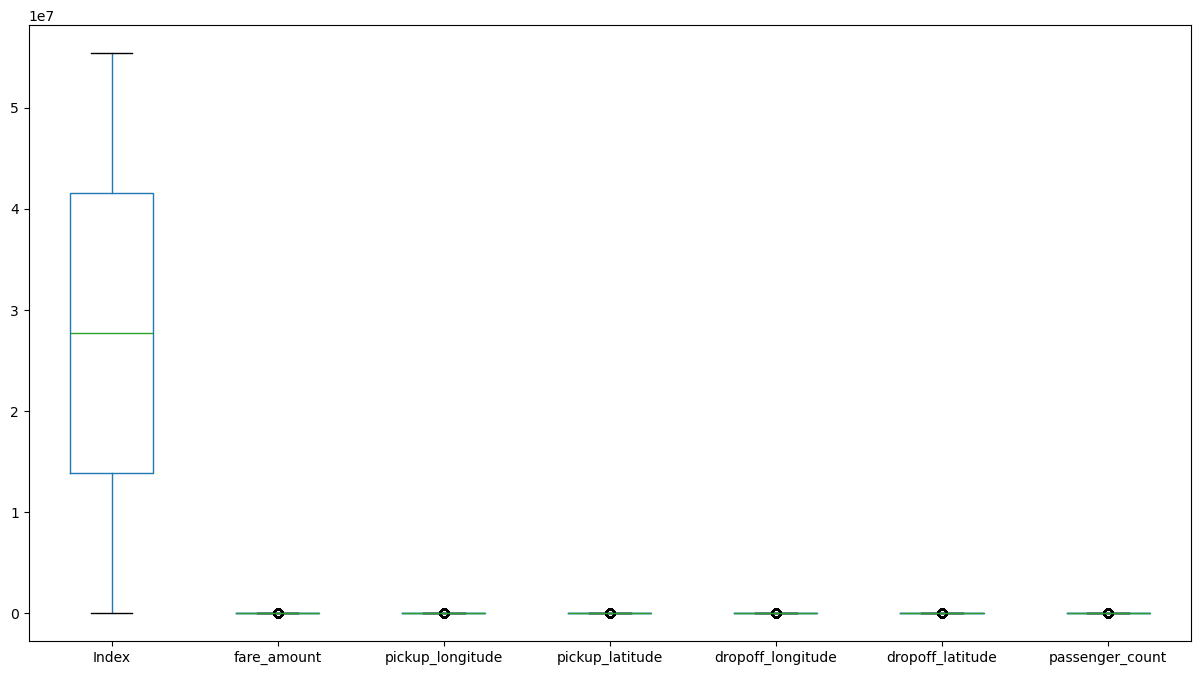

In [10]:
df.boxplot(column=['Index','fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'],grid=False,figsize=(15,8))
plt.show()

In [11]:
def outliers(col):
    ser=pd.Series(df[col])
    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)
    iqr=q3-q1
    uf=q3+1.5*iqr
    lf=q1-1.5*iqr
    for z in ser:
        if z>uf or z<lf:
            df[col]=df[col].replace([z],df[col].mean())

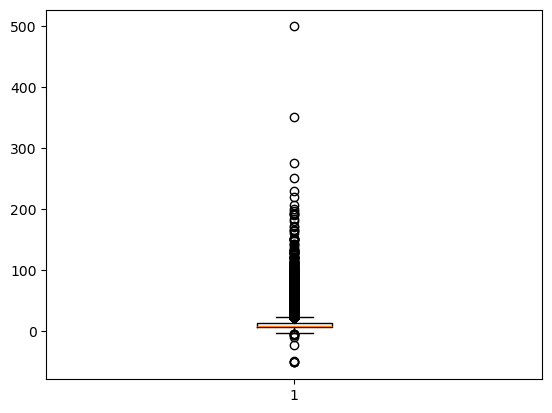

In [12]:
plt.boxplot(df['fare_amount'])
plt.show()

In [13]:
outliers('fare_amount')

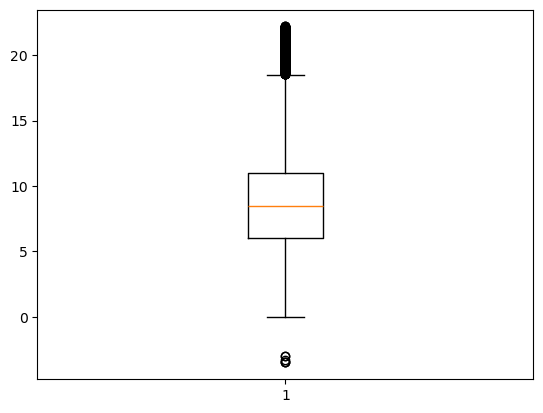

In [14]:
plt.boxplot(df['fare_amount'])
plt.show()

In [15]:
outliers('fare_amount')

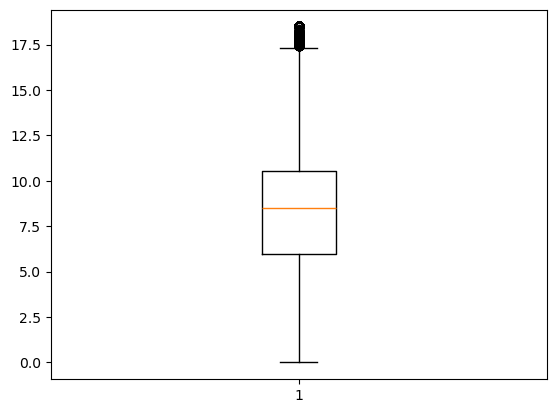

In [16]:
plt.boxplot(df['fare_amount'])
plt.show()

In [17]:
outliers('fare_amount')

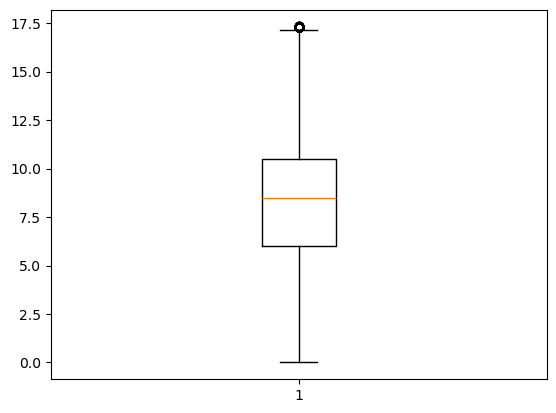

In [18]:
plt.boxplot(df['fare_amount'])
plt.show()

In [19]:
outliers('fare_amount')

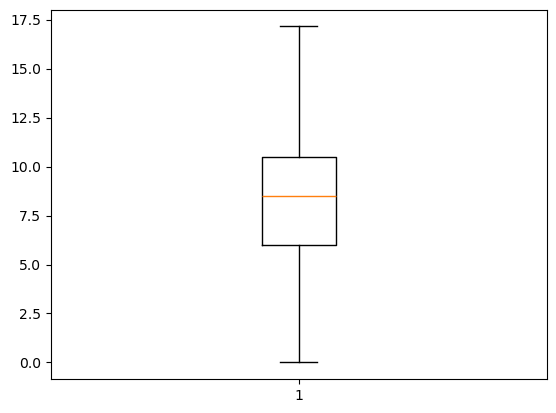

In [20]:
plt.boxplot(df['fare_amount'])
plt.show()

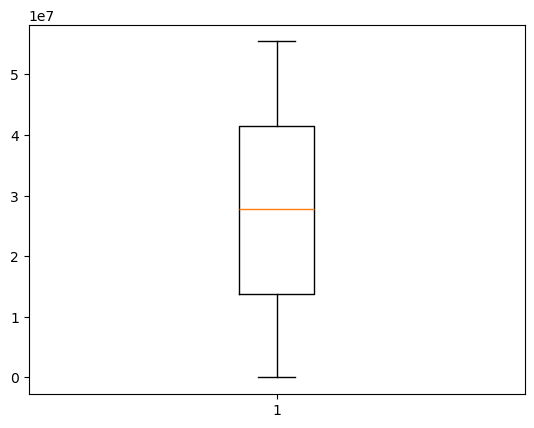

In [21]:
plt.boxplot(df['Index'])
plt.show()

In [52]:
# task3

size=[10,15,30,200,1000,5000,10000,50000,100000]
data=[]
for i in size:
    sample_df=df['fare_amount'].sample(n=i,replace=True,random_state=1)
    data.append(sample_df)

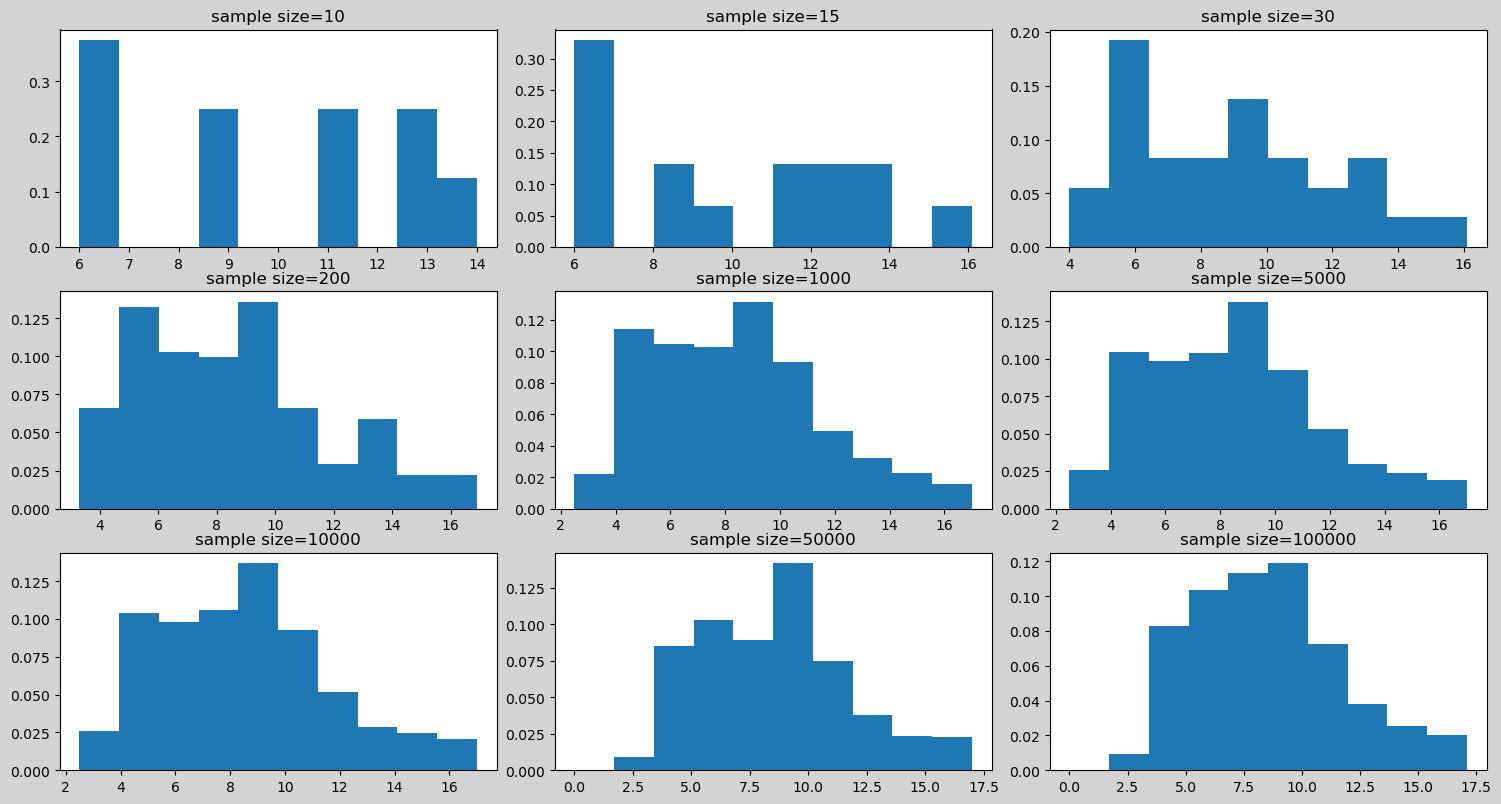

In [94]:
fig,ax=plt.subplots(3,3,figsize=(15,8))
fig.tight_layout()
fig.set_facecolor('lightgrey')
k=0
for i in range(0,3):
    for j in range(0,3):
        ax[i,j].hist(data[k],bins=10,density=True)
        
        ax[i,j].set_title('sample size='+str(len(data[k])))
        k=k+1
plt.show()

# 

In [66]:
# task4
sample_200=df['fare_amount'].sample(n=200,replace=True,random_state=1)
sample_200=sample_200.reset_index(drop=True)
sample_200
                                  

0      11.25193
1      14.00000
2      12.90000
3       6.00000
4       6.10000
         ...   
195     7.70000
196     4.50000
197    13.00000
198     4.50000
199    10.00000
Name: fare_amount, Length: 200, dtype: float64

In [68]:
# task5

p_mean=df['fare_amount'].mean()
p_median=df['fare_amount'].median()
p_std=st.stdev(df['fare_amount'])
p_skew=sc.skew(df['fare_amount'],bias=False)
p_kurtosis=sc.kurtosis(df['fare_amount'],bias=False)
print('population_mean:',p_mean)
print('population_median:',p_median)
print('population_std:',p_std)
print('population_skew:',p_skew)
print('population_kurtosis:',p_kurtosis)

population_mean: 8.507131515482902
population_median: 8.5
population_std: 3.1592616239346887
population_skew: 0.5289349990856437
population_kurtosis: -0.2247477639423292


In [70]:
s_mean=st.mean(sample_200)
s_median=st.median(sample_200)
s_std=st.stdev(sample_200)
s_skew=sc.skew(sample_200,bias=False)
s_kurtosis=sc.kurtosis(sample_200,bias=False)
print('sample_mean:',s_mean)
print('sample_median:',s_median)
print('sample_std:',s_std)
print('sample_skew:',s_skew)
print('sample_kurtosid:',s_kurtosis)

sample_mean: 8.592899947089352
sample_median: 8.5
sample_std: 3.174727328294172
sample_skew: 0.5419399971647388
sample_kurtosid: -0.3784460526900557


In [72]:
new_df=pd.DataFrame()
for i in range(0,20):
    new_df['sample_'+str(i)]=df['fare_amount'].sample(n=200,replace=True).reset_index(drop=True)

In [74]:
new_df

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19
0,9.789406,8.000000,15.700000,10.1,10.100000,9.000000,6.900000,5.300000,6.500000,5.3,4.9,9.190991,10.867687,4.900000,6.100000,16.900000,3.700000,11.700000,12.1,8.500000
1,7.500000,6.500000,12.900000,6.9,9.300000,11.359955,4.900000,7.500000,9.000000,2.5,4.5,9.500000,3.700000,9.500000,7.300000,6.900000,8.533258,8.670463,12.1,8.610159
2,14.000000,4.500000,10.624100,14.1,8.900000,8.781581,5.500000,10.111984,9.300000,8.9,10.1,5.000000,4.500000,10.500000,6.900000,12.000000,11.300000,15.500000,4.5,9.000000
3,7.500000,12.900000,5.700000,8.1,11.001686,8.500000,5.300000,11.500000,11.128949,15.3,9.0,8.900000,6.000000,8.854988,8.500000,9.500000,5.500000,6.100000,13.7,4.900000
4,10.500000,4.100000,10.500000,15.5,9.500000,12.900000,4.500000,7.000000,14.500000,5.7,13.0,6.100000,9.500000,11.500000,8.500000,12.900000,14.900000,11.001686,6.5,11.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8.500000,12.000000,9.500000,6.1,4.500000,9.300000,8.888105,12.000000,4.500000,8.1,6.1,10.500000,9.000000,11.300000,8.000000,8.705226,3.700000,8.500000,7.3,6.500000
196,6.500000,11.300000,5.700000,8.9,8.705226,8.937265,6.100000,9.500000,6.900000,4.5,12.0,5.500000,13.300000,8.794036,12.000000,4.000000,4.900000,15.700000,3.3,5.300000
197,6.500000,16.500000,9.624853,6.9,10.500000,11.300000,7.300000,8.100000,9.700000,15.0,5.3,5.700000,7.300000,4.100000,5.300000,8.610159,10.100000,12.000000,3.5,13.700000
198,5.500000,10.853233,10.306800,12.9,5.000000,6.500000,9.300000,6.100000,5.500000,4.5,9.7,7.700000,12.100000,4.500000,2.500000,15.700000,9.521758,4.000000,7.0,4.500000


In [76]:
sample_name=new_df.columns
data_s=[]
mean_df=pd.DataFrame()


for i in sample_name:
    data_s.append(new_df[i].mean())

mean_df.insert(0,'sample_name',sample_name)
mean_df.insert(1,'mean_values',data_s)

In [78]:
mean_df

,sample_name,mean_values
0,sample_0,8.523807
1,sample_1,8.384698
2,sample_2,8.807357
3,sample_3,8.650710
4,sample_4,8.503213
5,sample_5,9.005411
6,sample_6,8.837363
7,sample_7,8.677909
8,sample_8,8.447586
9,sample_9,8.590550


In [82]:
standard_deviation=st.stdev(mean_df['mean_values'])
standard_deviation

0.1633160044916961

In [86]:
import math as m
calulated_sd=p_std/m.sqrt(200)
calulated_sd

0.22339353178266427

In [ ]:
#interpretation
# 1) Mean & median: Mean and median of the population and sample of size 200 are around the same
# 2) kurtosis & skewness:
# Kurtosis of sample is biased. The sample is positively skewed
# kurtosis of the population is ~0.6 implying lighter tail. The population is also posistively skewed
# 3) standard deviation of 20 number of sample mean ~ standard deviation of sample from population divided by sqrt of sample size
# The population and sample of size of 200 both doesnt represent Gaussian curve and has light tail.
# The sample curve somewhat represents the population curve not exactly.